# Multiple Linear Regression

In this notebook, the Multiple Linear Regression Model is used with 4 different target variables.
1. Covid Confirmed Cases
2. Covid Deaths
3. Covid Confirmed Cases Rate
4. Covid Death Rate

<b> Table of Contents: </b>
<br> [Import and Load the Dataset](#000)
<br> [LinReg with Target Var 'Covid Confirmed Cases'](#100)
<br> [LinReg with Target Var 'Covid Death Cases'](#200)
<br> [LinReg with Target Var 'Covid Confirmed Case Rate'](#300)
<br> [LinReg with Target Var 'Covid Confirmed Death Rate'](#400)
<br> [Comparing Evaluations'](#500)

___
<a id = "000"> <h2> Import and Load the Dataset </h2> </a>

In [2]:
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy  import stats
%matplotlib inline

___
<a id = "100"> <h2> LinReg with Target Var 'Covid Confirmed Cases' </h2> </a>

In [3]:
data = pd.read_csv('tristate_final_data.csv')  # load data set
data.tail()

,NAME,Covid Confirmed Cases,Covid Deaths,Population,Covid Case Rate (per 1000),Covid Death Rate (per 1000),Households SNAP,Estimated Individuals SNAP,Total Citizen Educated in US,Citizen Less than High School Education,...,Asian Race,Pacific Islander Race,Other Race Alone,Hispanic or Latino,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families
86,"Middlesex County, Connecticut",50786,6341,165676,306.538062,38.273498,5850,13982,118781,7140,...,58,2154,3414,157842,43.1,41.9,44.1,67202,2,35098
87,"New Haven County, Connecticut",544454,40947,862477,631.267848,47.476049,52580,130924,595779,59891,...,334,51981,22808,732734,39.3,37.8,40.6,334502,2,192974
88,"New London County, Connecticut",46001,3303,274055,167.853168,12.052325,13837,33762,188628,15314,...,180,8722,10027,250841,40.4,38.8,42.0,107057,2,59599
89,"Tolland County, Connecticut",36536,2859,152691,239.280639,18.724090,4556,11436,95679,5616,...,36,2367,2754,146089,38.3,37.0,39.4,54477,3,30884
90,"Windham County, Connecticut",16276,490,118428,137.433715,4.137535,7426,18862,80756,9407,...,44,5002,2715,107077,39.2,38.1,40.4,44810,3,26446


In [4]:
data.shape

(91, 39)

In [5]:
# test output of specific column
data[['Citizen Income $10000-$14999']]

,Citizen Income $10000-$14999
0,20235
1,3776
2,123943
3,15421
4,7100
...,...
86,9329
87,54410
88,18272
89,9094


__Describe the Dataset__

In [6]:
desc_data = data.describe()
desc_data

,Covid Confirmed Cases,Covid Deaths,Population,Covid Case Rate (per 1000),Covid Death Rate (per 1000),Households SNAP,Estimated Individuals SNAP,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,...,Asian Race,Pacific Islander Race,Other Race Alone,Hispanic or Latino,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families
count,9.100000e+01,91.000000,9.100000e+01,91.000000,91.000000,91.000000,91.000000,9.100000e+01,91.000000,91.000000,...,91.000000,91.000000,91.000000,9.100000e+01,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,3.456057e+05,24234.989011,3.488362e+05,494.782434,30.009640,18293.857143,47275.835165,2.451077e+05,30821.109890,65796.329670,...,145.461538,24173.087912,10097.010989,2.889334e+05,40.156044,38.840659,41.445055,130804.417582,2.439560,79199.538462
std,7.060102e+05,59348.612086,4.688670e+05,569.681260,36.520683,35039.232590,93199.614618,3.390094e+05,58806.714504,84838.264728,...,264.790622,57081.322656,17237.898715,3.622369e+05,3.098071,3.229894,3.023473,174684.685378,0.499083,106185.924341
min,3.040000e+02,0.000000,4.836000e+03,16.823179,0.000000,112.000000,235.000000,3.604000e+03,441.000000,1155.000000,...,2.000000,4.000000,53.000000,4.785000e+03,29.800000,28.500000,31.100000,2262.000000,2.000000,795.000000
25%,5.696000e+03,222.500000,6.495600e+04,88.358613,3.932980,3339.000000,8134.500000,4.454750e+04,4884.500000,15221.000000,...,16.500000,526.000000,1006.500000,6.262450e+04,38.500000,37.000000,39.900000,25598.000000,2.000000,13431.000000
50%,3.653600e+04,1815.000000,1.492650e+05,230.123991,13.455905,6896.000000,17693.000000,9.567900e+04,9121.000000,31537.000000,...,37.000000,2211.000000,3036.000000,1.266640e+05,40.400000,39.200000,41.900000,54244.000000,2.000000,30884.000000
75%,2.973320e+05,19315.000000,4.678780e+05,698.363567,48.039981,16277.000000,41301.500000,3.225095e+05,29749.500000,85696.000000,...,164.000000,18173.000000,11900.000000,3.770460e+05,41.700000,40.550000,42.950000,166551.500000,3.000000,108228.000000
max,3.587059e+06,347696.000000,2.504700e+06,2523.785079,168.955056,231794.000000,623526.000000,1.789355e+06,345445.000000,461228.000000,...,1530.000000,351011.000000,100913.000000,2.008415e+06,51.300000,50.900000,51.800000,916856.000000,3.000000,594378.000000


In [7]:
# epxploring outliers in the dataset
# add the standard deviation metric 
data.loc['+3_std'] = desc_data.loc['mean'] + (desc_data.loc['std']*3)
data.loc['-3_std'] = desc_data.loc['mean'] - (desc_data.loc['std']*3)

desc_data

,Covid Confirmed Cases,Covid Deaths,Population,Covid Case Rate (per 1000),Covid Death Rate (per 1000),Households SNAP,Estimated Individuals SNAP,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,...,Asian Race,Pacific Islander Race,Other Race Alone,Hispanic or Latino,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families
count,9.100000e+01,91.000000,9.100000e+01,91.000000,91.000000,91.000000,91.000000,9.100000e+01,91.000000,91.000000,...,91.000000,91.000000,91.000000,9.100000e+01,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,3.456057e+05,24234.989011,3.488362e+05,494.782434,30.009640,18293.857143,47275.835165,2.451077e+05,30821.109890,65796.329670,...,145.461538,24173.087912,10097.010989,2.889334e+05,40.156044,38.840659,41.445055,130804.417582,2.439560,79199.538462
std,7.060102e+05,59348.612086,4.688670e+05,569.681260,36.520683,35039.232590,93199.614618,3.390094e+05,58806.714504,84838.264728,...,264.790622,57081.322656,17237.898715,3.622369e+05,3.098071,3.229894,3.023473,174684.685378,0.499083,106185.924341
min,3.040000e+02,0.000000,4.836000e+03,16.823179,0.000000,112.000000,235.000000,3.604000e+03,441.000000,1155.000000,...,2.000000,4.000000,53.000000,4.785000e+03,29.800000,28.500000,31.100000,2262.000000,2.000000,795.000000
25%,5.696000e+03,222.500000,6.495600e+04,88.358613,3.932980,3339.000000,8134.500000,4.454750e+04,4884.500000,15221.000000,...,16.500000,526.000000,1006.500000,6.262450e+04,38.500000,37.000000,39.900000,25598.000000,2.000000,13431.000000
50%,3.653600e+04,1815.000000,1.492650e+05,230.123991,13.455905,6896.000000,17693.000000,9.567900e+04,9121.000000,31537.000000,...,37.000000,2211.000000,3036.000000,1.266640e+05,40.400000,39.200000,41.900000,54244.000000,2.000000,30884.000000
75%,2.973320e+05,19315.000000,4.678780e+05,698.363567,48.039981,16277.000000,41301.500000,3.225095e+05,29749.500000,85696.000000,...,164.000000,18173.000000,11900.000000,3.770460e+05,41.700000,40.550000,42.950000,166551.500000,3.000000,108228.000000
max,3.587059e+06,347696.000000,2.504700e+06,2523.785079,168.955056,231794.000000,623526.000000,1.789355e+06,345445.000000,461228.000000,...,1530.000000,351011.000000,100913.000000,2.008415e+06,51.300000,50.900000,51.800000,916856.000000,3.000000,594378.000000


In [8]:
# filter the outliers
#data_remove = data[(np.abs(stats.zscore(data))<3).all(axis=1)]

# show what rows were removed 
#data.index.difference(data_remove.index)
# Outcome: New York Counties with high amount of Covid Cases would be removed 

__Take Away__
Should we remove the outliers? 
- No, outliers are necessary in this dataset because it shows counties with the highest or lowest amount of COVID Confirmed Cases. In the above code block, when run, the New York counties with the highest amount of COVID cases were removed. We DO NOT want to do that; this project is focused on finding the counties with the most amount of Covid Confirmed Cases. 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 0 to -3_std
Data columns (total 39 columns):
NAME                                          91 non-null object
Covid Confirmed Cases                         93 non-null float64
Covid Deaths                                  93 non-null float64
Population                                    93 non-null float64
Covid Case Rate (per 1000)                    93 non-null float64
Covid Death Rate (per 1000)                   93 non-null float64
 Households SNAP                              93 non-null float64
 Estimated Individuals SNAP                   93 non-null float64
 Total Citizen Educated in US                 93 non-null float64
 Citizen Less than High School  Education     93 non-null float64
 Citizen High School  Graduate                93 non-null float64
 Citizen Some College  Education              93 non-null float64
 Citizen College Degree                       93 non-null float64
 Citizen Graduate or Professional Degree 

In [10]:
#data1.hist()

In [11]:
# set the index equal to the NAME column (county, state) 
# drop the NAME column from the data df
data.index = data['NAME']
data = data.drop('NAME', axis=1)
data.head()

,Covid Confirmed Cases,Covid Deaths,Population,Covid Case Rate (per 1000),Covid Death Rate (per 1000),Households SNAP,Estimated Individuals SNAP,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,...,Asian Race,Pacific Islander Race,Other Race Alone,Hispanic or Latino,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families
NAME,,,,,,,,,,,,,,,,,,,,,
"Albany County, New York",87943.0,3989.0,304204.0,289.092188,13.112911,15087.0,34247.0,204833.0,15255.0,50589.0,...,98.0,4744.0,7647.0,289287.0,38.5,36.8,40.0,126251.0,2.0,60631.0
"Allegany County, New York",2601.0,126.0,48946.0,53.140195,2.574266,2994.0,7305.0,30331.0,3219.0,11464.0,...,9.0,206.0,557.0,48276.0,37.8,36.2,39.2,18208.0,2.0,10576.0
"Bronx County, New York",2544478.0,234021.0,1385108.0,1837.024983,168.955056,184934.0,512267.0,927374.0,264309.0,256066.0,...,1288.0,351011.0,73243.0,643695.0,32.8,30.6,34.9,483449.0,3.0,368196.0
"Broome County, New York",24218.0,1802.0,200600.0,120.727817,8.983051,13226.0,30684.0,129802.0,12429.0,40700.0,...,82.0,1912.0,5087.0,193822.0,40.2,38.1,42.2,82167.0,2.0,40559.0
"Cattaraugus County, New York",3875.0,128.0,80317.0,48.246324,1.593685,5801.0,13980.0,53201.0,6188.0,21015.0,...,15.0,305.0,1363.0,78972.0,40.7,39.8,41.6,32263.0,2.0,18801.0


In [12]:
data.isnull().any()

Covid Confirmed Cases                         False
Covid Deaths                                  False
Population                                    False
Covid Case Rate (per 1000)                    False
Covid Death Rate (per 1000)                   False
 Households SNAP                              False
 Estimated Individuals SNAP                   False
 Total Citizen Educated in US                 False
 Citizen Less than High School  Education     False
 Citizen High School  Graduate                False
 Citizen Some College  Education              False
 Citizen College Degree                       False
 Citizen Graduate or Professional Degree      False
 Total Citizen Income                         False
 Citizen No Income                            False
Citizen Income $1-$9999                       False
Citizen Income $10000-$14999                  False
Citizen Income $15000-$24999                  False
Citizen Income $25000-$34999                  False
Citizen Inco

In [13]:
# set the data type to float for the data frame
data = data.astype(float)
data.dtypes

Covid Confirmed Cases                         float64
Covid Deaths                                  float64
Population                                    float64
Covid Case Rate (per 1000)                    float64
Covid Death Rate (per 1000)                   float64
 Households SNAP                              float64
 Estimated Individuals SNAP                   float64
 Total Citizen Educated in US                 float64
 Citizen Less than High School  Education     float64
 Citizen High School  Graduate                float64
 Citizen Some College  Education              float64
 Citizen College Degree                       float64
 Citizen Graduate or Professional Degree      float64
 Total Citizen Income                         float64
 Citizen No Income                            float64
Citizen Income $1-$9999                       float64
Citizen Income $10000-$14999                  float64
Citizen Income $15000-$24999                  float64
Citizen Income $25000-$34999

___
# Data Exploration

,Covid Confirmed Cases,Covid Deaths,Population,Covid Case Rate (per 1000),Covid Death Rate (per 1000),Households SNAP,Estimated Individuals SNAP,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,...,Asian Race,Pacific Islander Race,Other Race Alone,Hispanic or Latino,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families
Covid Confirmed Cases,1.000000,0.946343,0.939945,0.809679,0.882591,0.824807,0.839012,0.937521,0.931299,0.930849,...,0.916453,0.908096,0.942518,0.900000,-0.151396,-0.167396,-0.134063,0.911245,0.528366,0.943920
Covid Deaths,0.946343,1.000000,0.930824,0.672282,0.860526,0.919649,0.929755,0.932932,0.987584,0.928184,...,0.963049,0.944415,0.964880,0.882440,-0.157190,-0.168183,-0.143524,0.913807,0.452970,0.926314
Population,0.939945,0.930824,1.000000,0.712426,0.844080,0.883241,0.879921,0.997955,0.940400,0.980252,...,0.927249,0.876092,0.958579,0.987286,-0.164414,-0.182925,-0.149657,0.992372,0.475680,0.989351
Covid Case Rate (per 1000),0.809679,0.672282,0.712426,1.000000,0.886569,0.563662,0.580082,0.704882,0.658982,0.699773,...,0.653435,0.685112,0.698708,0.677851,-0.150018,-0.175034,-0.126506,0.683121,0.658162,0.736174
Covid Death Rate (per 1000),0.882591,0.860526,0.844080,0.886569,1.000000,0.775890,0.787589,0.840472,0.844259,0.835307,...,0.836986,0.860707,0.860661,0.791937,-0.157934,-0.176625,-0.142832,0.825232,0.635488,0.855646
Households SNAP,0.824807,0.919649,0.883241,0.563662,0.775890,1.000000,0.996045,0.880110,0.955703,0.869095,...,0.922313,0.913779,0.908570,0.834604,-0.209990,-0.224703,-0.195080,0.888667,0.344237,0.884345
Estimated Individuals SNAP,0.839012,0.929755,0.879921,0.580082,0.787589,0.996045,1.000000,0.874055,0.961490,0.878202,...,0.925084,0.921144,0.907778,0.828016,-0.210691,-0.227555,-0.193126,0.875297,0.370239,0.890993
Total Citizen Educated in US,0.937521,0.932932,0.997955,0.704882,0.840472,0.880110,0.874055,1.000000,0.941104,0.975534,...,0.929175,0.875952,0.962095,0.986764,-0.159595,-0.175957,-0.146319,0.995602,0.465539,0.982494
Citizen Less than High School Education,0.931299,0.987584,0.940400,0.658982,0.844259,0.955703,0.961490,0.941104,1.000000,0.936939,...,0.978162,0.961590,0.978376,0.889527,-0.196483,-0.209368,-0.181522,0.929672,0.434403,0.935792
Citizen High School Graduate,0.930849,0.928184,0.980252,0.699773,0.835307,0.869095,0.878202,0.975534,0.936939,1.000000,...,0.915315,0.864888,0.941665,0.968614,-0.158470,-0.182700,-0.136912,0.958648,0.489731,0.985229


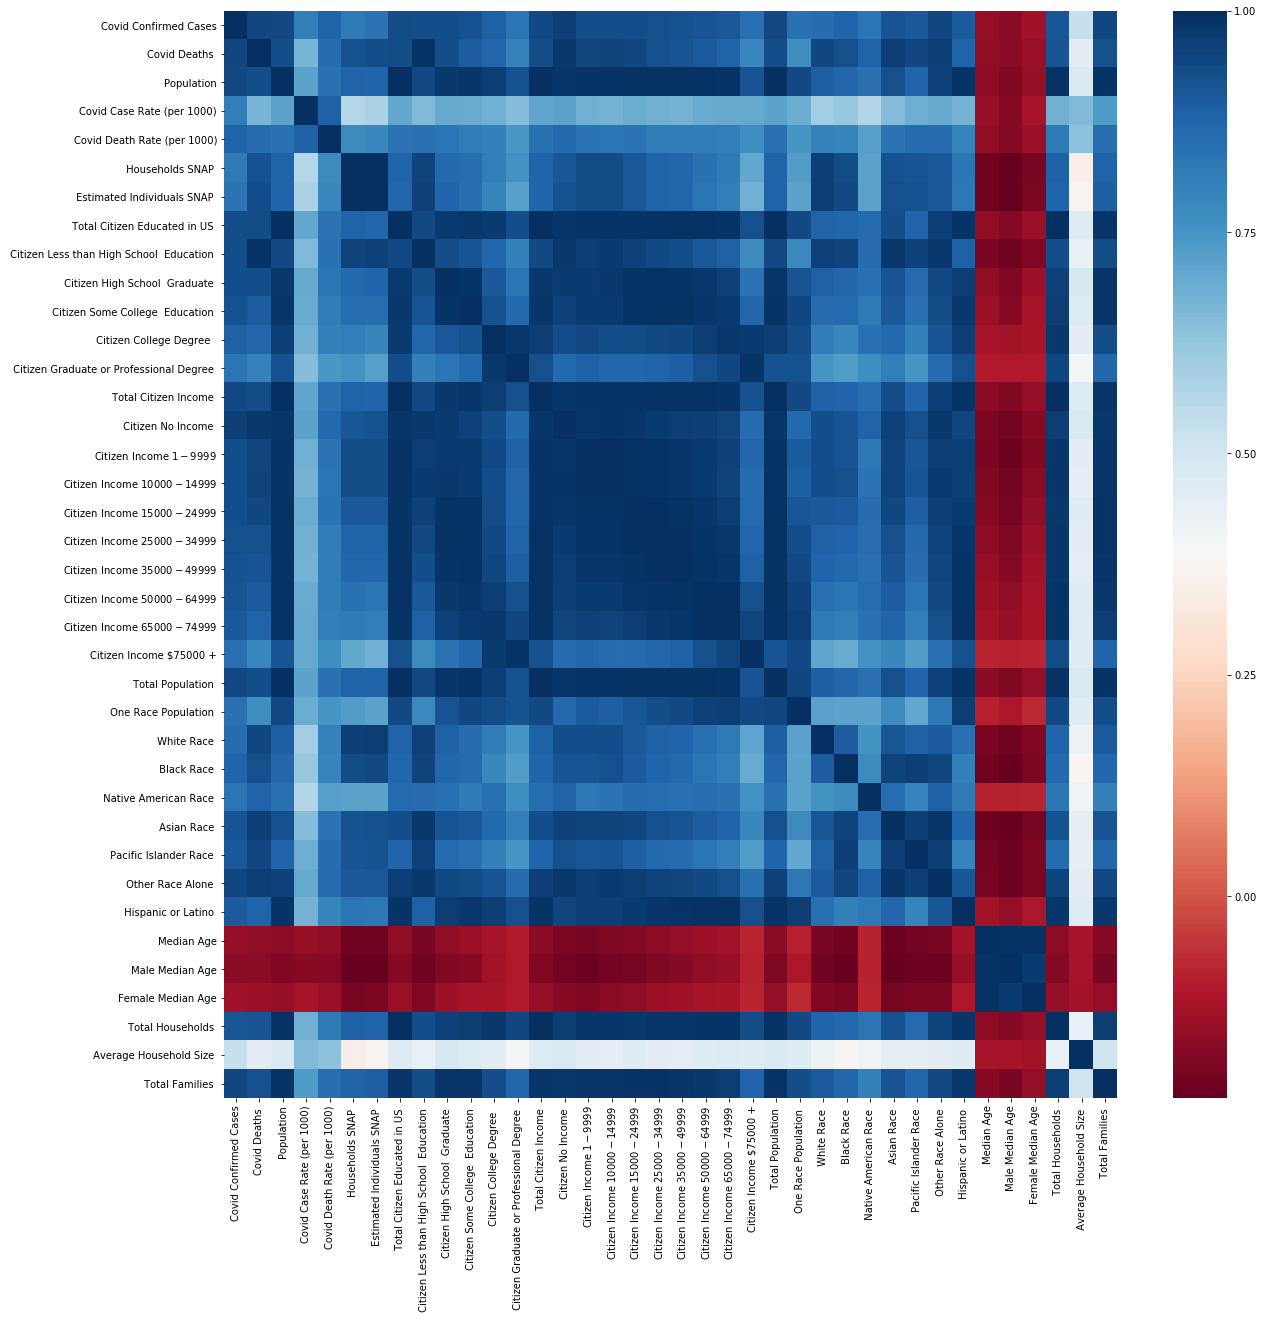

In [14]:
# print out a correlation matrix of the data frame
corr = data.corr()

# display it
display(corr)
f, ax = plt.subplots(figsize=(20, 20)) # adjust the size of the heat map to see all the features 

# plot a heatmap
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")

__Take Away__
- The darker the spots the higher the correlation between the features. 
- We are looking at our __Target Variable: Covid Confirmed Cases__ and you see for
    - Income 'No Income' has the highest correlation
    - Race 'Other Race Alone', 'Asian Race', 'Hispanic or Lation', and 'Black Race' have a higher correlation than 'White Race'
    - Gender 'Male Median Age' has a higher correlation compared to 'Female Median Age'

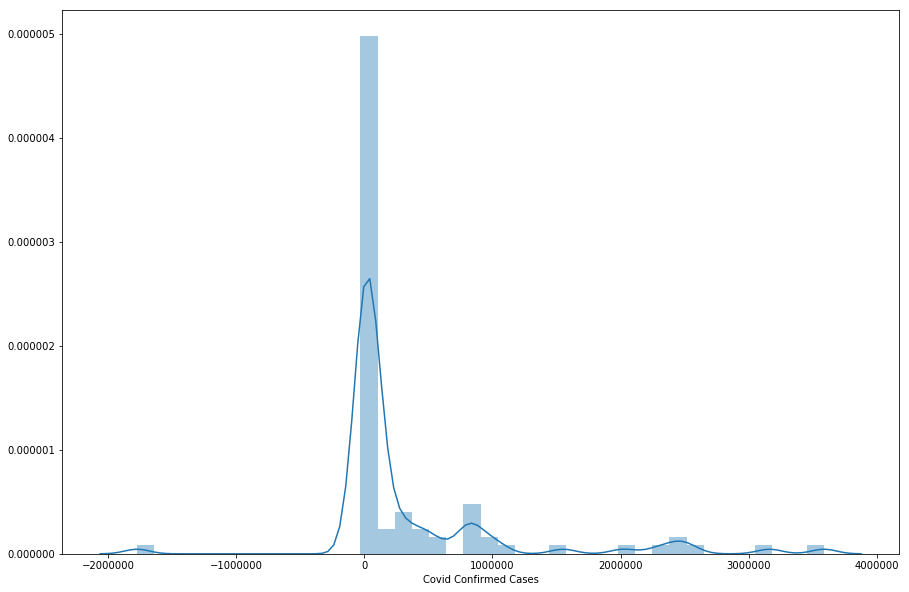

In [15]:
# check the average level of COVID Confirmed Cases
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['Covid Confirmed Cases'])

- Looking at the relationships between Covid Confirmed Cases and Race (White vs Black), Education (No high degree vs Masters or Professional), and Income Level (Second lowest income bracket vs Highest income bracket)

In [16]:
# trim the spaces of the cells from the csv file
data.columns = data.columns.to_series().apply(lambda x: x.strip())

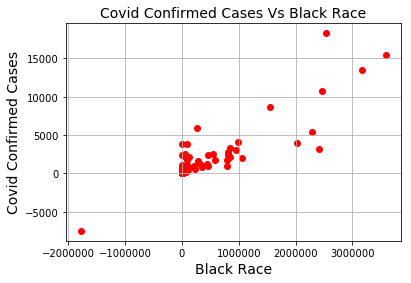

In [17]:
# scatter plot relationship between Covid Cases and Black Race
plt.scatter(data['Covid Confirmed Cases'], data['Black Race'], color='red')
plt.title('Covid Confirmed Cases Vs Black Race', fontsize=14)
plt.xlabel('Black Race', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

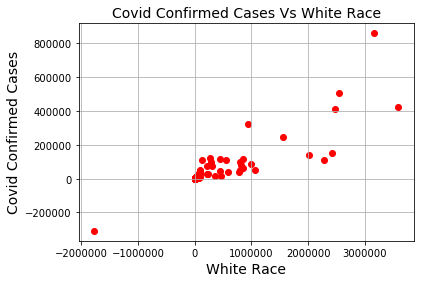

In [18]:
# scatter plot relationship between Covid Cases and and White Race
plt.scatter(data['Covid Confirmed Cases'], data['White Race'], color='red')
plt.title('Covid Confirmed Cases Vs White Race', fontsize=14)
plt.xlabel('White Race', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

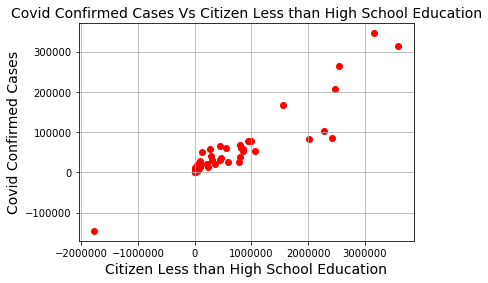

In [19]:
# scatter plot relationship between Covid Cases and Citizen Less than High School Education
plt.scatter(data['Covid Confirmed Cases'], data['Citizen Less than High School  Education'], color='red')
plt.title('Covid Confirmed Cases Vs Citizen Less than High School Education', fontsize=14)
plt.xlabel('Citizen Less than High School Education', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

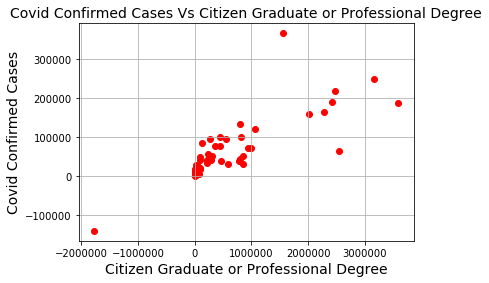

In [20]:
# scatter plot relationship between Covid Cases and Citizen Graduate or Professional Degree
plt.scatter(data['Covid Confirmed Cases'], data['Citizen Graduate or Professional Degree'], color='red')
plt.title('Covid Confirmed Cases Vs Citizen Graduate or Professional Degree', fontsize=14)
plt.xlabel('Citizen Graduate or Professional Degree', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

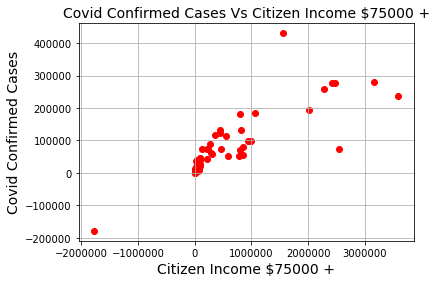

In [21]:
# scatter plot relationship between Covid Cases and Citizen Income $75,000 + (highest income bracket)
plt.scatter(data['Covid Confirmed Cases'], data['Citizen Income $75000 +'], color='red')
plt.title('Covid Confirmed Cases Vs Citizen Income $75000 +', fontsize=14)
plt.xlabel('Citizen Income $75000 +', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

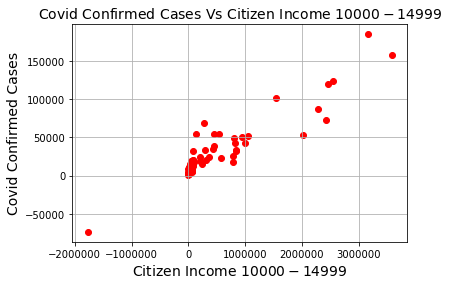

In [22]:
# scatter plot relationship between Covid Cases and Citizen Income $10,000-$14,999 (second lowest income bracket)
plt.scatter(data['Covid Confirmed Cases'], data['Citizen Income $10000-$14999'], color='red')
plt.title('Covid Confirmed Cases Vs Citizen Income $10000-$14999', fontsize=14)
plt.xlabel('Citizen Income $10000-$14999', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

__Take Away__
- Visually it is hard to tell with these scatter plots, however, there seems to be a more linear, in other words, stronger correlation between Black Race, Low Education, and Low Income and the number of Covid Confirmed Cases than features of the opposite race, education and income level.
___

# Build the Model

In [23]:
# divide the dataset into attributes and lables 
# x variable contains all the attributes/features-- took out Age bc float type
# y varaible contains labels

X = data[['Population','Households SNAP','Estimated Individuals SNAP','Total Citizen Educated in US','Citizen Less than High School  Education','Citizen High School  Graduate','Citizen Some College  Education','Citizen College Degree','Citizen Graduate or Professional Degree','Total Citizen Income','Citizen No Income','Citizen Income $1-$9999','Citizen Income $10000-$14999','Citizen Income $15000-$24999','Citizen Income $25000-$34999','Citizen Income $35000-$49999','Citizen Income $50000-$64999','Citizen Income $65000-$74999','Citizen Income $75000 +','One Race Population','White Race','Black Race','Native American Race','Asian Race','Pacific Islander Race','Other Race Alone','Hispanic or Latino','Total Households','Average Household Size','Total Families']]
y = data['Covid Confirmed Cases']

In [24]:
# splait data set 
# split 80% of the data to the training set while 20% of the data to test set using below code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [25]:
# train our model
regressor = LinearRegression() 

# fit the model
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

___
# Exploring the Output

In [26]:
# get the intercept and coef
intercept = regressor.intercept_

In [27]:
coef = regressor.coef_

In [28]:
# print the intercept of the model
print('The intercept of our model is {:.4}'.format(intercept))
print('-'*100)

# loop through the dict and print the coef for each variable
for cf in zip(X.columns, coef):
    print('The Coefficient for {} is {:.2}'.format(cf[0],cf[1]))

The intercept of our model is -6.165e+04
----------------------------------------------------------------------------------------------------
The Coefficient for Population is 0.33
The Coefficient for Households SNAP is -1e+02
The Coefficient for Estimated Individuals SNAP is 3.5e+01
The Coefficient for Total Citizen Educated in US is 1.7e+01
The Coefficient for Citizen Less than High School  Education is -2.9
The Coefficient for Citizen High School  Graduate is -1.2e+01
The Coefficient for Citizen Some College  Education is -1.4e+01
The Coefficient for Citizen College Degree is -1.4e+01
The Coefficient for Citizen Graduate or Professional Degree is 1.1e+01
The Coefficient for Total Citizen Income is 8.2
The Coefficient for Citizen No Income is -7.3
The Coefficient for Citizen Income $1-$9999 is -2.8e+01
The Coefficient for Citizen Income $10000-$14999 is 6.1e+01
The Coefficient for Citizen Income $15000-$24999 is -1.1e+01
The Coefficient for Citizen Income $25000-$34999 is -3.9e+01
Th

In [29]:
# mutlivariable lin reg, reg model will show the most optimal coefficients for all attributes 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Population,0.334298
Households SNAP,-102.991005
Estimated Individuals SNAP,34.692501
Total Citizen Educated in US,17.409532
Citizen Less than High School Education,-2.948770
Citizen High School Graduate,-12.044721
Citizen Some College Education,-14.073315
Citizen College Degree,-13.662630
Citizen Graduate or Professional Degree,10.968904
Total Citizen Income,8.165950


# Evaluating the Model

In [30]:
# predicition on the test data
y_pred = regressor.predict(X_test)
y_pred

array([-3.68939554e+03,  9.97806977e+04,  6.67269457e+05, -1.50807679e+04,
        1.03320424e+05, -4.04841068e+03, -3.68245350e+04,  6.30692950e+05,
        3.69665068e+04,  1.05930805e+05,  7.67293639e+04, -6.53487744e+03,
        5.04031358e+06, -1.35656890e+04,  4.18926803e+04,  3.37017592e+05,
        9.49868211e+04, -5.44662584e+03, -1.21247830e+04])

In [31]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1

,Actual,Predicted
NAME,,
"Salem County, New Jersey",23756.0,-3.689396e+03
"Gloucester County, New Jersey",98935.0,9.978070e+04
"Richmond County, New York",792054.0,6.672695e+05
"Chautauqua County, New York",3302.0,-1.508077e+04
"Greene County, New York",10814.0,1.033204e+05
"Clinton County, New York",5039.0,-4.048411e+03
"Allegany County, New York",2601.0,-3.682454e+04
"Rockland County, New York",786631.0,6.306930e+05
"Rensselaer County, New York",22753.0,3.696651e+04


In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 149055.47166656243
Mean Squared Error: 192041290647.0154
Root Mean Squared Error: 438225.1597603855


___
<a id = "200"> <h2> LinReg with Target Var 'Covid Deaths' </h2> </a>

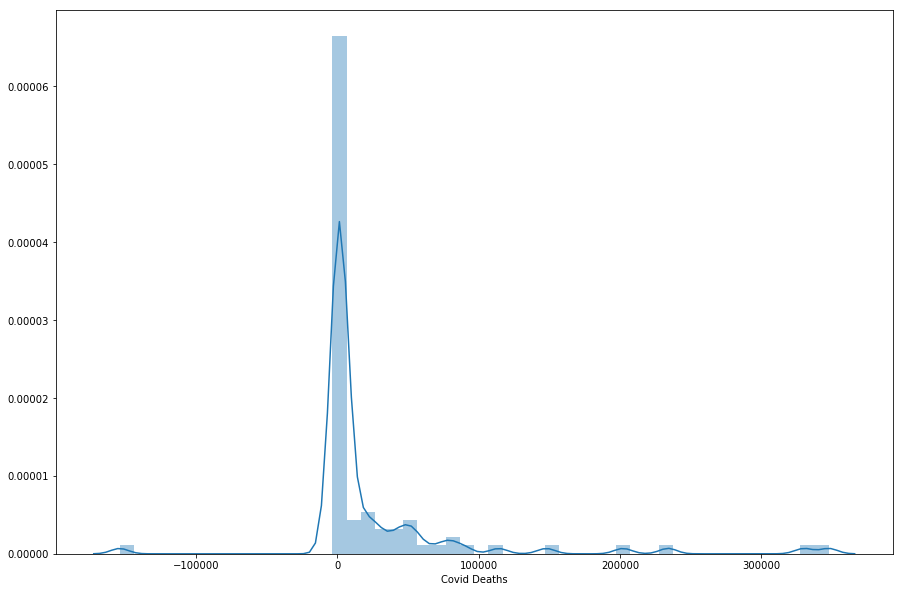

In [68]:
# check the average level of COVID Deaths
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['Covid Deaths'])

__Describe the Dataset__

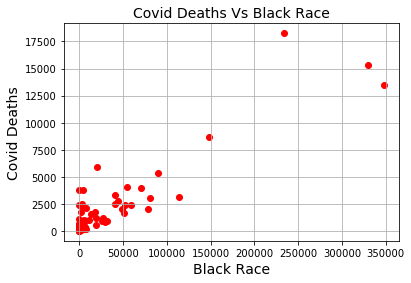

In [55]:
# scatter plot relationship between Covid Cases and Black Race
plt.scatter(data2['Covid Deaths'], data2['Black Race'], color='red')
plt.title('Covid Deaths Vs Black Race', fontsize=14)
plt.xlabel('Black Race', fontsize=14)
plt.ylabel('Covid Deaths', fontsize=14)
plt.grid(True)
plt.show()

# CHANGE ALL THESE -- covid deaths

In [ ]:
# scatter plot relationship between Covid Cases and and White Race
plt.scatter(data['Covid Confirmed Cases'], data['White Race'], color='red')
plt.title('Covid Confirmed Cases Vs White Race', fontsize=14)
plt.xlabel('White Race', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# scatter plot relationship between Covid Cases and Citizen Less than High School Education
plt.scatter(data['Covid Confirmed Cases'], data['Citizen Less than High School  Education'], color='red')
plt.title('Covid Confirmed Cases Vs Citizen Less than High School Education', fontsize=14)
plt.xlabel('Citizen Less than High School Education', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# scatter plot relationship between Covid Cases and Citizen Graduate or Professional Degree
plt.scatter(data['Covid Confirmed Cases'], data['Citizen Graduate or Professional Degree'], color='red')
plt.title('Covid Confirmed Cases Vs Citizen Graduate or Professional Degree', fontsize=14)
plt.xlabel('Citizen Graduate or Professional Degree', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# scatter plot relationship between Covid Cases and Citizen Income $75,000 + (highest income bracket)
plt.scatter(data['Covid Confirmed Cases'], data['Citizen Income $75,000 +'], color='red')
plt.title('Covid Confirmed Cases Vs Citizen Income $75,000 +', fontsize=14)
plt.xlabel('Citizen Income $75,000 +', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# scatter plot relationship between Covid Cases and Citizen Income $10,000-$14,999 (second lowest income bracket)
plt.scatter(data['Covid Confirmed Cases'], data['Citizen Income $10,000-$14,999'], color='red')
plt.title('Covid Confirmed Cases Vs Citizen Income $10,000-$14,999', fontsize=14)
plt.xlabel('Citizen Income $10,000-$14,999', fontsize=14)
plt.ylabel('Covid Confirmed Cases', fontsize=14)
plt.grid(True)
plt.show()

__Take Away__
- Visually it is hard to tell with these scatter plots, however, there seems to be a more linear, in other words, stronger correlation between Black Race, Low Education, and Low Income and the number of Covid Confirmed Cases than features of the opposite race, education and income level.
___

CHANGE FOR COVID DEATHS 

# Build the Model

In [58]:
# divide the dataset into attributes and lables 
# x variable contains all the attributes/features-- took out Age bc float type
# y varaible contains labels

X = data[['Population','Households SNAP','Estimated Individuals SNAP','Total Citizen Educated in US','Citizen Less than High School  Education','Citizen High School  Graduate','Citizen Some College  Education','Citizen College Degree','Citizen Graduate or Professional Degree','Total Citizen Income','Citizen No Income','Citizen Income $1-$9999','Citizen Income $10000-$14999','Citizen Income $15000-$24999','Citizen Income $25000-$34999','Citizen Income $35000-$49999','Citizen Income $50000-$64999','Citizen Income $65000-$74999','Citizen Income $75000 +','One Race Population','White Race','Black Race','Native American Race','Asian Race','Pacific Islander Race','Other Race Alone','Hispanic or Latino','Total Households','Average Household Size','Total Families']]
y = data['Covid Deaths']



In [59]:
# splait data set 
# split 80% of the data to the training set while 20% of the data to test set using below code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [60]:
# train our model
regressor = LinearRegression() 

# fit the model
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

___
# Exploring the Output

In [61]:
# get the intercept and coef
intercept = regressor.intercept_

In [62]:
coef = regressor.coef_

In [63]:
# print the intercept of the model
print('The intercept of our model is {:.4}'.format(intercept))
print('-'*100)

# loop through the dict and print the coef for each variable
for cf in zip(X.columns, coef):
    print('The Coefficient for {} is {:.2}'.format(cf[0],cf[1]))

The intercept of our model is 977.1
----------------------------------------------------------------------------------------------------
The Coefficient for Population is 0.033
The Coefficient for Households SNAP is -1.1e+01
The Coefficient for Estimated Individuals SNAP is 4.4
The Coefficient for Total Citizen Educated in US is -1.1
The Coefficient for Citizen Less than High School  Education is 1.7
The Coefficient for Citizen High School  Graduate is 0.74
The Coefficient for Citizen Some College  Education is 0.33
The Coefficient for Citizen College Degree is 0.8
The Coefficient for Citizen Graduate or Professional Degree is 0.95
The Coefficient for Total Citizen Income is 0.6
The Coefficient for Citizen No Income is 0.085
The Coefficient for Citizen Income $1-$9999 is -1.0
The Coefficient for Citizen Income $10000-$14999 is 3.5
The Coefficient for Citizen Income $15000-$24999 is 1.1
The Coefficient for Citizen Income $25000-$34999 is -2.8
The Coefficient for Citizen Income $35000-$4

In [64]:
# mutlivariable lin reg, reg model will show the most optimal coefficients for all attributes 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Population,0.033495
Households SNAP,-10.776295
Estimated Individuals SNAP,4.385261
Total Citizen Educated in US,-1.054716
Citizen Less than High School Education,1.728938
Citizen High School Graduate,0.740972
Citizen Some College Education,0.327395
Citizen College Degree,0.799521
Citizen Graduate or Professional Degree,0.953096
Total Citizen Income,0.603144


# Evaluating the Model

In [65]:
# predicition on the test data
y_pred = regressor.predict(X_test)
y_pred

array([ 1.68747720e+03,  1.44616489e+04,  4.10066420e+04, -5.03311586e+03,
        5.15904586e+03,  7.06195516e+02, -9.64822565e+02,  3.40783676e+04,
        1.74795412e+03,  2.77691205e+03,  1.42055910e+03,  2.11040589e+03,
        5.36626366e+05,  4.08714626e+01,  1.08721682e+03,  4.16232165e+03,
        1.81580740e+04,  4.12607125e+03, -2.48197885e+02])

In [66]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1

,Actual,Predicted
NAME,,
"Salem County, New Jersey",1302.0,1687.477203
"Gloucester County, New Jersey",5268.0,14461.648899
"Richmond County, New York",50674.0,41006.642019
"Chautauqua County, New York",119.0,-5033.115861
"Greene County, New York",456.0,5159.045857
"Clinton County, New York",228.0,706.195516
"Allegany County, New York",126.0,-964.822565
"Rockland County, New York",26203.0,34078.367639
"Rensselaer County, New York",1131.0,1747.954117


In [67]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 13594.823838433635
Mean Squared Error: 1914804893.2574928
Root Mean Squared Error: 43758.48367182635


___
<a id = "300"> <h2> LinReg with Target Var 'Covid Case Rate' </h2> </a>

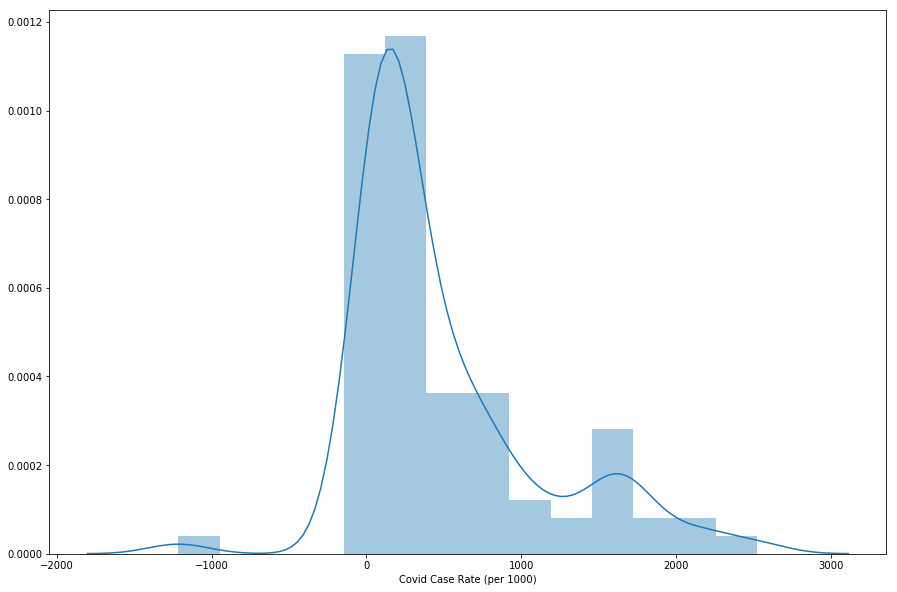

In [69]:
# check the average level of COVID Confirmed Cases
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['Covid Case Rate (per 1000)'])

# Build the Model

In [70]:
# divide the dataset into attributes and lables 
# x variable contains all the attributes/features-- took out Age bc float type
# y varaible contains labels

X = data[['Population','Households SNAP','Estimated Individuals SNAP','Total Citizen Educated in US','Citizen Less than High School  Education','Citizen High School  Graduate','Citizen Some College  Education','Citizen College Degree','Citizen Graduate or Professional Degree','Total Citizen Income','Citizen No Income','Citizen Income $1-$9999','Citizen Income $10000-$14999','Citizen Income $15000-$24999','Citizen Income $25000-$34999','Citizen Income $35000-$49999','Citizen Income $50000-$64999','Citizen Income $65000-$74999','Citizen Income $75000 +','One Race Population','White Race','Black Race','Native American Race','Asian Race','Pacific Islander Race','Other Race Alone','Hispanic or Latino','Total Households','Average Household Size','Total Families']]
y = data['Covid Case Rate (per 1000)']



In [71]:
# splait data set 
# split 80% of the data to the training set while 20% of the data to test set using below code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [72]:
# train our model
regressor = LinearRegression() 

# fit the model
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

___
# Exploring the Output

In [73]:
# get the intercept and coef
intercept = regressor.intercept_

In [74]:
coef = regressor.coef_

In [75]:
# print the intercept of the model
print('The intercept of our model is {:.4}'.format(intercept))
print('-'*100)

# loop through the dict and print the coef for each variable
for cf in zip(X.columns, coef):
    print('The Coefficient for {} is {:.2}'.format(cf[0],cf[1]))

The intercept of our model is 8.901
----------------------------------------------------------------------------------------------------
The Coefficient for Population is -0.0011
The Coefficient for Households SNAP is -0.25
The Coefficient for Estimated Individuals SNAP is 0.091
The Coefficient for Total Citizen Educated in US is 0.09
The Coefficient for Citizen Less than High School  Education is -0.073
The Coefficient for Citizen High School  Graduate is -0.071
The Coefficient for Citizen Some College  Education is -0.069
The Coefficient for Citizen College Degree is -0.077
The Coefficient for Citizen Graduate or Professional Degree is -0.045
The Coefficient for Total Citizen Income is 0.0089
The Coefficient for Citizen No Income is -0.048
The Coefficient for Citizen Income $1-$9999 is -0.02
The Coefficient for Citizen Income $10000-$14999 is -0.024
The Coefficient for Citizen Income $15000-$24999 is -0.046
The Coefficient for Citizen Income $25000-$34999 is -0.074
The Coefficient fo

In [76]:
# mutlivariable lin reg, reg model will show the most optimal coefficients for all attributes 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Population,-0.001082
Households SNAP,-0.252085
Estimated Individuals SNAP,0.090959
Total Citizen Educated in US,0.089609
Citizen Less than High School Education,-0.073082
Citizen High School Graduate,-0.070797
Citizen Some College Education,-0.068624
Citizen College Degree,-0.076650
Citizen Graduate or Professional Degree,-0.044549
Total Citizen Income,0.008920


# Evaluating the Model

In [77]:
# predicition on the test data
y_pred = regressor.predict(X_test)
y_pred

array([ 250.36922776,  411.65240858, 1151.54138476,  260.54872449,
        245.80673161,   30.82294345,  160.82193375,  676.8423034 ,
        266.3236301 ,  331.15266335,  102.4084379 ,  200.68429697,
       3322.4319202 ,   60.08986943,  233.07704107,  370.33327964,
        179.97853979,  271.6511723 ,  170.08385724])

In [78]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1

,Actual,Predicted
NAME,,
"Salem County, New Jersey",359.487311,250.369228
"Gloucester County, New Jersey",343.181124,411.652409
"Richmond County, New York",1689.787298,1151.541385
"Chautauqua County, New York",24.476483,260.548724
"Greene County, New York",219.702972,245.806732
"Clinton County, New York",61.355445,30.822943
"Allegany County, New York",53.140195,160.821934
"Rockland County, New York",2523.785079,676.842303
"Rensselaer County, New York",142.715566,266.323630


In [80]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 374.1233195522182
Mean Squared Error: 505990.67287029827
Root Mean Squared Error: 711.3302136633156


___
<a id = "400"> <h2> LinReg with Target Var 'Covid Death Rate' </h2> </a>

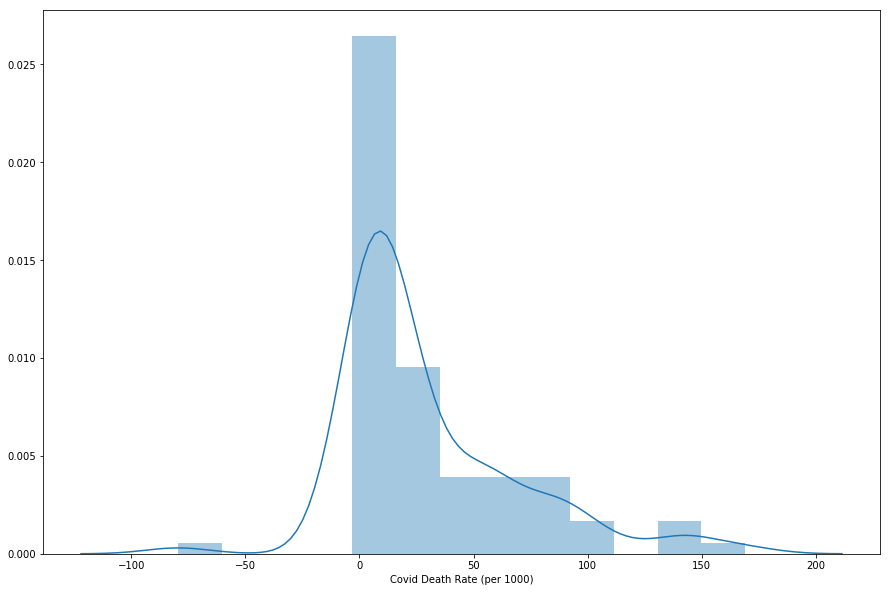

In [81]:
# check the average level of COVID Confirmed Cases
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['Covid Death Rate (per 1000)'])

# Build the Model

In [82]:
# divide the dataset into attributes and lables 
# x variable contains all the attributes/features-- took out Age bc float type
# y varaible contains labels

X = data[['Population','Households SNAP','Estimated Individuals SNAP','Total Citizen Educated in US','Citizen Less than High School  Education','Citizen High School  Graduate','Citizen Some College  Education','Citizen College Degree','Citizen Graduate or Professional Degree','Total Citizen Income','Citizen No Income','Citizen Income $1-$9999','Citizen Income $10000-$14999','Citizen Income $15000-$24999','Citizen Income $25000-$34999','Citizen Income $35000-$49999','Citizen Income $50000-$64999','Citizen Income $65000-$74999','Citizen Income $75000 +','One Race Population','White Race','Black Race','Native American Race','Asian Race','Pacific Islander Race','Other Race Alone','Hispanic or Latino','Total Households','Average Household Size','Total Families']]
y = data['Covid Death Rate (per 1000)']

In [83]:
# splait data set 
# split 80% of the data to the training set while 20% of the data to test set using below code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [84]:
# train our model
regressor = LinearRegression() 

# fit the model
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

___
# Exploring the Output

In [85]:
# get the intercept and coef
intercept = regressor.intercept_

In [86]:
coef = regressor.coef_

In [87]:
# print the intercept of the model
print('The intercept of our model is {:.4}'.format(intercept))
print('-'*100)

# loop through the dict and print the coef for each variable
for cf in zip(X.columns, coef):
    print('The Coefficient for {} is {:.2}'.format(cf[0],cf[1]))

The intercept of our model is -5.995
----------------------------------------------------------------------------------------------------
The Coefficient for Population is -2e-05
The Coefficient for Households SNAP is -0.026
The Coefficient for Estimated Individuals SNAP is 0.011
The Coefficient for Total Citizen Educated in US is 0.0034
The Coefficient for Citizen Less than High School  Education is -0.0039
The Coefficient for Citizen High School  Graduate is -0.0041
The Coefficient for Citizen Some College  Education is -0.004
The Coefficient for Citizen College Degree is -0.0046
The Coefficient for Citizen Graduate or Professional Degree is -0.0036
The Coefficient for Total Citizen Income is 0.0019
The Coefficient for Citizen No Income is -0.003
The Coefficient for Citizen Income $1-$9999 is -0.0028
The Coefficient for Citizen Income $10000-$14999 is -0.0011
The Coefficient for Citizen Income $15000-$24999 is -0.00034
The Coefficient for Citizen Income $25000-$34999 is -0.0061
The C

In [88]:
# mutlivariable lin reg, reg model will show the most optimal coefficients for all attributes 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Population,-0.000020
Households SNAP,-0.026415
Estimated Individuals SNAP,0.010713
Total Citizen Educated in US,0.003393
Citizen Less than High School Education,-0.003884
Citizen High School Graduate,-0.004105
Citizen Some College Education,-0.003957
Citizen College Degree,-0.004563
Citizen Graduate or Professional Degree,-0.003575
Total Citizen Income,0.001886


# Evaluating the Model

In [89]:
# predicition on the test data
y_pred = regressor.predict(X_test)
y_pred

array([ 21.54858239,  33.12184822,  68.56777131,   2.75113176,
        12.12040115,  -1.31667727,   7.83564963,  47.48802274,
        15.64834717,  21.05359222,  -2.39697577,  10.35921987,
       456.44204171,   3.60195014,  11.1841529 ,  16.1862022 ,
        32.50969852,  22.8726399 ,  10.0101047 ])

In [90]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1

,Actual,Predicted
NAME,,
"Salem County, New Jersey",19.702495,21.548582
"Gloucester County, New Jersey",18.273393,33.121848
"Richmond County, New York",108.109146,68.567771
"Chautauqua County, New York",0.882102,2.751132
"Greene County, New York",9.264338,12.120401
"Clinton County, New York",2.776154,-1.316677
"Allegany County, New York",2.574266,7.835650
"Rockland County, New York",84.068312,47.488023
"Rensselaer County, New York",7.094067,15.648347


In [91]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 27.82604405574946
Mean Squared Error: 5574.245431320701
Root Mean Squared Error: 74.66086947873498


___
<a id = "000"> <h2> Comparing Evaluations </h2> </a>

In [ ]:
# create table in excel and convert to markdown table 

In [92]:
# Additional notes:
# - go back and create scatter plots for each target variable and include "Take Aways"